In [314]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pyplot as plt
import scipy.optimize as op
from sklearn.svm import SVC

# Support Vector Machines Implementation

In [315]:
data = loadmat('data/ex6data1.mat')
x = data['X']
y = data['y']

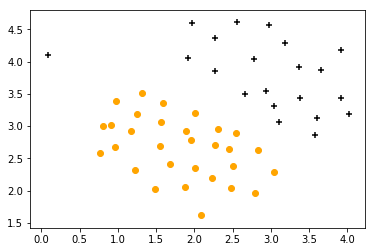

In [316]:
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


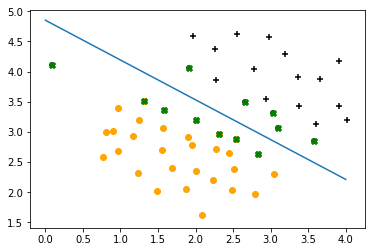

In [317]:
lin = SVC(kernel='linear', C=1)
lin.fit(x,y)

# ax + by = c  
# a = coef_[0][0], b = coef_[0][1], c = intercept_

plt.plot(np.linspace(0,4), (lin.intercept_/-lin.coef_[0][1]+ (-lin.coef_[0][0]/lin.coef_[0][1]*np.linspace(0,4))))
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')
        
plt.scatter(lin.support_vectors_[:,0], lin.support_vectors_[:,1], c='green', marker='X')

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


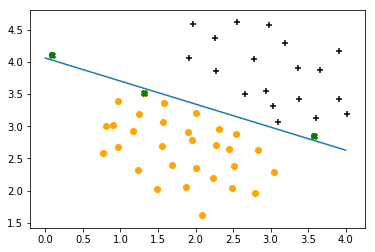

In [318]:
lin = SVC(kernel='linear', C=100)
lin.fit(x,y)

# ax + by = c  
# a = coef_[0][0], b = coef_[0][1], c = intercept_

plt.plot(np.linspace(0,4), (lin.intercept_/-lin.coef_[0][1]+ (-lin.coef_[0][0]/lin.coef_[0][1]*np.linspace(0,4))))
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')
        
plt.scatter(lin.support_vectors_[:,0], lin.support_vectors_[:,1], c='green', marker='X')

In [319]:
def gaussian(x1, x2):
    sigma = 2
    return np.exp( -(1/(2*(sigma**2))) * (x1-x2).dot((x1-x2).T) )

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])

gaussian(x1,x2)

0.32465246735834974

In [320]:
data2 = loadmat('data/ex6data2.mat')
x = data2['X']
y = data2['y']

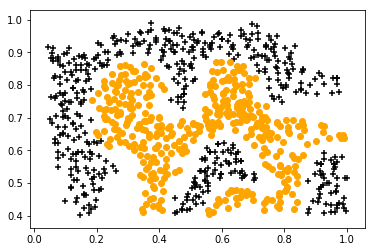

In [321]:
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


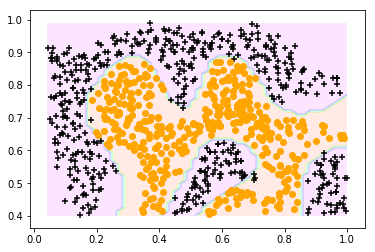

In [322]:
gau = SVC(kernel='rbf', C=30, gamma=20)
gau.fit(x,y)

xx, yy = np.meshgrid(np.linspace(np.min(x[:,0]), np.max(x[:,0])), np.linspace(np.min(x[:,1]),np.max(x[:,1])))
Z = gau.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)
plt.contourf(xx, yy, Z, cmap='gist_rainbow', alpha=0.1)

for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')

In [323]:
data3 = loadmat('data/ex6data3.mat')
x = data3['X']
y = data3['y']
xval = data3['Xval']
yval = data3['yval']

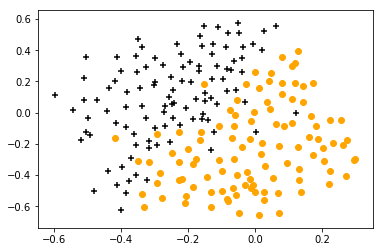

In [324]:
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.943127962085308
0.95


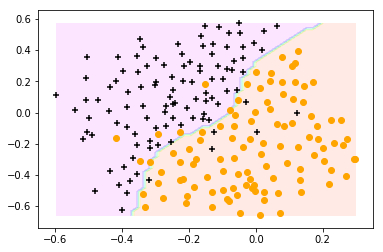

In [325]:
# Fitting with training sets 

gau2 = SVC(kernel='rbf', C=10, gamma=10)
gau2.fit(x,y)

# Evaluate estimation score between training-sets & test-sets

print(gau2.score(x,y))
print(gau2.score(xval,yval))

xx, yy = np.meshgrid(np.linspace(np.min(x[:,0]), np.max(x[:,0])), np.linspace(np.min(x[:,1]),np.max(x[:,1])))
Z = gau2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.1)
plt.contourf(xx, yy, Z, cmap='gist_rainbow', alpha=0.1)

for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i,0],x[i,1],marker='o',c='orange')
    else:
        plt.scatter(x[i,0],x[i,1],marker='+',c='black')

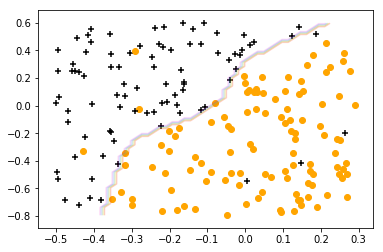

In [326]:
# test with testing sets

xx, yy = np.meshgrid(np.linspace(np.min(xval[:,0]), np.max(xval[:,0])), np.linspace(np.min(xval[:,1]),np.max(xval[:,1])))
Z = gau2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, [0.1, 0.2, 0.5], cmap='gist_rainbow', alpha=0.1)
plt.contour(xx, yy, Z, cmap='gist_rainbow', alpha=0.1)
for i in range(len(xval)):
    if yval[i] == 0:
        plt.scatter(xval[i,0],xval[i,1],marker='o',c='orange')
    else:
        plt.scatter(xval[i,0],xval[i,1],marker='+',c='black')

# Spam Classification

In [327]:
from nltk.stem import PorterStemmer
import re

data4 = pd.read_table('data/vocab.txt', header=None)
vocabList = dict()
for i in range(len(data4)):
    vocabList[data4[1][i]] = i


def processEmail(email_contents, vocabList):
    """preprocesses a the body of an email and
    returns a list of word_indices
    word_indices = PROCESSEMAIL(email_contents) preprocesses
    the body of an email and returns a list of indices of the
    words contained in the email.
    """

# Init return value
    word_indices = []

# ========================== Preprocess Email ===========================

# Find the Headers ( \n\n and remove )
# Uncomment the following lines if you are working with raw emails with the
# full headers

# hdrstart = strfind(email_contents, ([chr(10) chr(10)]))
# email_contents = email_contents(hdrstart(1):end)

# Lower case
    email_contents = email_contents.lower()

# Strip all HTML
# Looks for any expression that starts with < and ends with > and replace
# and does not have any < or > in the tag it with a space
    rx = re.compile('<[^<>]+>|\n')
    email_contents = rx.sub(' ', email_contents)
# Handle Numbers
# Look for one or more characters between 0-9
    rx = re.compile('[0-9]+')
    email_contents = rx.sub('number ', email_contents)

# Handle URLS
# Look for strings starting with http:// or https://
    rx = re.compile('(http|https)://[^\s]*')
    email_contents = rx.sub('httpaddr ', email_contents)

# Handle Email Addresses
# Look for strings with @ in the middle
    rx = re.compile('[^\s]+@[^\s]+')
    email_contents = rx.sub('emailaddr ', email_contents)

# Handle $ sign
    rx = re.compile('[$]+')
    email_contents = rx.sub('dollar ', email_contents)

# ========================== Tokenize Email ===========================

# Process file
    l = 0

# Remove any non alphanumeric characters
    rx = re.compile('[^a-zA-Z0-9 ]')
    email_contents = rx.sub('', email_contents).split()

    ps = PorterStemmer()
    for str in email_contents:

        # Tokenize and also get rid of any punctuation
        # str = re.split('[' + re.escape(' @$/#.-:&*+=[]?!(){},''">_<#')
        #                                + chr(10) + chr(13) + ']', str)

        # Stem the word
        # (the porterStemmer sometimes has issues, so we use a try catch block)
        try:
            str = ps.stem(str.strip())
        except:
            str = ''
            continue

        # Skip the word if it is too short
        if len(str) < 1:
           continue
        if vocabList.get(str,None) is not None:
            word_indices.append(vocabList.get(str)+1)
        
        # word_indices.append(vocabList[str])
        # Look up the word in the dictionary and add to word_indices if
        # found
        # ====================== YOUR CODE HERE ======================
        # Instructions: Fill in this function to add the index of str to
        #               word_indices if it is in the vocabulary. At this point
        #               of the code, you have a stemmed word from the email in
        #               the variable str. You should look up str in the
        #               vocabulary list (vocabList). If a match exists, you
        #               should add the index of the word to the word_indices
        #               vector. Concretely, if str = 'action', then you should
        #               look up the vocabulary list to find where in vocabList
        #               'action' appears. For example, if vocabList{18} =
        #               'action', then, you should add 18 to the word_indices
        #               vector (e.g., word_indices = [word_indices  18] ).
        #
        # Note: vocabList{idx} returns a the word with index idx in the
        #       vocabulary list.
        #
        # Note: You can use strcmp(str1, str2) to compare two strings (str1 and
        #       str2). It will return 1 only if the two strings are equivalent.
        #




        # =============================================================

    return word_indices


word_indices = processEmail("""
> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


""", vocabList)
print(word_indices)

word_indices2 = processEmail("""
Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I've searched the 'net but have run out of ideas.
 
Or should I be going for a different version of Linux such as RedHat? Opinions
welcome.
 
Thanks a lot,
Peter

-- 
Irish Linux Users' Group: ilug@linux.ie
http://www.linux.ie/mailman/listinfo/ilug for (un)subscription information.
List maintainer: listmaster@linux.ie



""", vocabList)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 477, 1120, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


In [328]:
feat = np.zeros((len(vocabList),1))
for i in word_indices:
    feat[i] = 1
feat = feat.reshape(1,-1)

feat2 = np.zeros((len(vocabList),1))
for i in word_indices2:
    feat2[i] = 1
feat2 = feat2.reshape(1,-1)

In [329]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

x = spam_train['X']
y = spam_train['y'].ravel()
xtest = spam_test['Xtest']
ytest = spam_test['ytest'].ravel()

In [330]:
spam_svm = SVC(kernel='rbf', gamma='auto', probability=True)
spam_svm.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [333]:
print(spam_svm.score(x,y))

0.944


In [ ]:
print(spam_svm.score(xtest,ytest))

0.953


In [335]:
print(spam_svm.predict(feat))

print(spam_svm.predict(feat2))

print(spam_svm.predict_proba(feat), 
      spam_svm.predict_proba(feat2))

[0]
[0]
[[0.83180646 0.16819354]] [[0.98393929 0.01606071]]
